In [4]:
import pandas as pd
import datetime
import numpy as np

# EDA

In [21]:
train = '/Users/yeji/Desktop/ML Project/Books.train.csv'
test = '/Users/yeji/Desktop/ML Project/Books.test.csv'
validation = '/Users/yeji/Desktop/ML Project/Books.valid.csv'

train = pd.read_csv(train, low_memory=False)
test = pd.read_csv(test, low_memory=False)
validation = pd.read_csv(validation, low_memory=False)

In [22]:
train.head()

,user_id,parent_asin,rating,timestamp,history
0,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1446304000,5.0,1441260345000,NaN
1,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1564770672,5.0,1441260365000,1446304000
2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1442450703,5.0,1523093714024,1446304000 1564770672
3,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1780671067,1.0,1611623223325,1446304000 1564770672 1442450703
4,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1645671127,3.0,1612044209266,1446304000 1564770672 1442450703 1780671067


In [24]:
validation.head()

,user_id,parent_asin,rating,timestamp,history
0,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1782490671,5.0,1640383495102,1446304000 1564770672 1442450703 1780671067 16...
1,AGKASBHYZPGTEPO6LWZPVJWB2BVA,0802737803,5.0,1454676232000,0811849783 0803729952 0735336296 1508558884
2,AGXFEGMNVCSTSYYA5UWXDV7AFSXA,1594749310,5.0,1541884305941,1578052009 1477493395 1594747350
3,AFWHJ6O3PV4JC7PVOJH6CPULO2KQ,1633573001,5.0,1612225279592,B00INIQVJA 1496407903 1974633225 B07KD27RHM
4,AHXBL3QDWZGJYH7A5CMPFNUPMF7Q,0451450523,2.0,1635710722120,0920668372 1589255208 2764322836 2764330898 00...


In [23]:
test.head()

,user_id,parent_asin,rating,timestamp,history
0,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0593235657,5.0,1640629604904,1446304000 1564770672 1442450703 1780671067 16...
1,AGKASBHYZPGTEPO6LWZPVJWB2BVA,0803736800,4.0,1454676557000,0811849783 0803729952 0735336296 1508558884 08...
2,AGXFEGMNVCSTSYYA5UWXDV7AFSXA,1542046599,5.0,1605649719611,1578052009 1477493395 1594747350 1594749310
3,AFWHJ6O3PV4JC7PVOJH6CPULO2KQ,0679450815,5.0,1638987703546,B00INIQVJA 1496407903 1974633225 B07KD27RHM 16...
4,AHXBL3QDWZGJYH7A5CMPFNUPMF7Q,1250866448,5.0,1669414969335,0920668372 1589255208 2764322836 2764330898 00...


In [13]:
csv_path = "/Users/yeji/Desktop/ML Project/Books.csv"

# Load the data (try with low_memory=False to avoid dtype guessing issues)
df = pd.read_csv(csv_path, low_memory=False)

# Preview the data
print("First few rows:")
print(df.head())

print("\nShape:", df.shape)

print("\nColumn types:")
print(df.dtypes)

print("\nColumn names:")
print(df.columns.tolist())


First few rows:
                        user_id parent_asin  rating      timestamp
0  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1446304000     5.0  1441260345000
1  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1564770672     5.0  1441260365000
2  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1442450703     5.0  1523093714024
3  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1780671067     1.0  1611623223325
4  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1645671127     3.0  1612044209266

Shape: (9488297, 4)

Column types:
user_id         object
parent_asin     object
rating         float64
timestamp        int64
dtype: object

Column names:
['user_id', 'parent_asin', 'rating', 'timestamp']


In [14]:
# Rename for consistency
df.columns = ["user", "item", "rating", "timestamp"]
print(df.head())


                           user        item  rating      timestamp
0  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1446304000     5.0  1441260345000
1  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1564770672     5.0  1441260365000
2  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1442450703     5.0  1523093714024
3  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1780671067     1.0  1611623223325
4  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1645671127     3.0  1612044209266


In [15]:
n_users = df["user"].nunique()
n_items = df["item"].nunique()
n_interactions = len(df)

print(f"\nUnique users: {n_users}")
print(f"Unique items: {n_items}")
print(f"Total interactions: {n_interactions}")



Unique users: 776370
Unique items: 495063
Total interactions: 9488297


In [17]:
n_rating = df['rating'].nunique()
print(f"\nUnique ratings: {n_rating}")


Unique ratings: 5



Interactions per user (describe):
count    776370.000000
mean         12.221360
std          23.826171
min           5.000000
25%           6.000000
50%           7.000000
75%          11.000000
max        3134.000000
Name: count, dtype: float64


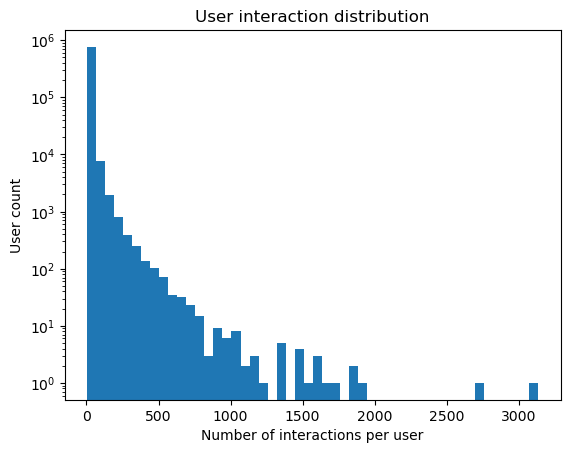

In [5]:
# How many ratings per user?
user_freq = df["user"].value_counts()
print("\nInteractions per user (describe):")
print(user_freq.describe())

# Histogram
import matplotlib.pyplot as plt

plt.hist(user_freq, bins=50, log=True)
plt.xlabel("Number of interactions per user")
plt.ylabel("User count")
plt.title("User interaction distribution")
plt.show()


# Model Approach (Content Based, CF, Hybrid)

## 1. Content Based

In [5]:
import numpy as np

mp = np.load("/home/ubuntu/Advanced_ML/data/mappings.npz", allow_pickle=True)

item_keys = mp["item_keys"]
item_vals = mp["item_vals"]

print("item_keys dtype:", item_keys.dtype, "shape:", item_keys.shape)
print("item_vals dtype:", item_vals.dtype, "shape:", item_vals.shape)

print("Sample keys:", item_keys[:5])
print("Sample vals:", item_vals[:5])


item_keys dtype: object shape: (494681,)
item_vals dtype: int64 shape: (494681,)
Sample keys: ['0061058386' '0441008534' '0441009239' '0375826688' '0765362643']
Sample vals: [0 1 2 3 4]


In [6]:
import numpy as np
import pandas as pd

# Load splits
train_df = pd.read_csv("/home/ubuntu/Advanced_ML/data/train.csv")
val_df   = pd.read_csv("/home/ubuntu/Advanced_ML/data/val.csv")
test_df  = pd.read_csv("/home/ubuntu/Advanced_ML/data/test.csv")

# Load mappings
mp = np.load("/home/ubuntu/Advanced_ML/data/mappings.npz", allow_pickle=True)
print("Keys in mappings.npz:", mp.files)

item_keys = mp["item_keys"]  # raw ASIN strings
item_vals = mp["item_vals"]  # int IDs

print("item_keys dtype:", item_keys.dtype, "shape:", item_keys.shape)
print("item_vals dtype:", item_vals.dtype, "shape:", item_vals.shape)
print("Sample keys:", item_keys[:5])
print("Sample vals:", item_vals[:5])

# Build raw -> int dict first (optional but nice to have)
raw2int = dict(zip(item_keys, item_vals))  # raw_asin -> int_id

# Now invert to get int -> raw
num_items = int(item_vals.max()) + 1       # assumes IDs are 0..num_items-1
item_int2raw = [None] * num_items

for raw_asin, int_id in raw2int.items():
    item_int2raw[int_id] = raw_asin

item_int2raw = np.array(item_int2raw)

# Sanity check
print("Length of item_int2raw:", len(item_int2raw))
print("First 5 entries of item_int2raw:", item_int2raw[:5])

# Your original asin_set:
asin_set = set(str(a) for a in item_int2raw.tolist())
print("Number of unique ASINs in graph:", len(asin_set))


Keys in mappings.npz: ['user_keys', 'user_vals', 'item_keys', 'item_vals']
item_keys dtype: object shape: (494681,)
item_vals dtype: int64 shape: (494681,)
Sample keys: ['0061058386' '0441008534' '0441009239' '0375826688' '0765362643']
Sample vals: [0 1 2 3 4]
Length of item_int2raw: 494681
First 5 entries of item_int2raw: ['0061058386' '0441008534' '0441009239' '0375826688' '0765362643']
Number of unique ASINs in graph: 494681


Load item embeddings into a numpy matrix

In [7]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.metrics import roc_auc_score

ITEM_EMB_CSV = "/home/ubuntu/Advanced_ML/data/item_embeddings_merged.csv"
TRAIN_CSV    = "/home/ubuntu/Advanced_ML/data/train.csv"
VAL_CSV      = "/home/ubuntu/Advanced_ML/data/val.csv"

# ---- Load item embeddings ----
emb_df = pd.read_csv(ITEM_EMB_CSV)
print("Embedding df shape:", emb_df.shape)
print(emb_df.head())

item_ids = emb_df["item_id_int"].values
emb_cols = [c for c in emb_df.columns if c.startswith("emb_")]
emb_dim = len(emb_cols)
print("Embedding dim:", emb_dim)

max_item_id = int(item_ids.max())
item_emb = np.zeros((max_item_id + 1, emb_dim), dtype=np.float32)
item_emb[item_ids] = emb_df[emb_cols].values


Embedding df shape: (494681, 129)
   item_id_int     emb_0     emb_1     emb_2     emb_3     emb_4     emb_5  \
0        71447  0.021240  0.048689  0.018081 -0.038519  0.005805 -0.034636   
1       364091  0.005687  0.009901 -0.002689 -0.036152  0.002526 -0.018814   
2        81258 -0.010680  0.009522  0.007078 -0.006307 -0.059232 -0.016755   
3       335468 -0.037288 -0.042173 -0.047132  0.011618 -0.008416  0.015954   
4       111229 -0.040663  0.120124  0.007500 -0.023893  0.015008  0.008697   

      emb_6     emb_7     emb_8  ...   emb_118   emb_119   emb_120   emb_121  \
0  0.036180  0.002390  0.017857  ...  0.043356  0.026977 -0.027005 -0.030450   
1  0.012948 -0.007484 -0.048425  ...  0.076538  0.030190 -0.054935  0.054905   
2  0.018614 -0.000252 -0.004569  ...  0.005983  0.058541  0.033817  0.018643   
3  0.070155 -0.016517  0.009566  ...  0.013288 -0.000660 -0.009241 -0.016230   
4  0.094907 -0.046244  0.056235  ... -0.016039  0.066872 -0.034263  0.012591   

    emb_122   em

Build item_emb matrix (id → vector)

In [8]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.metrics import roc_auc_score

ITEM_EMB_CSV = "/home/ubuntu/Advanced_ML/data/item_embeddings_merged.csv"
TRAIN_CSV    = "/home/ubuntu/Advanced_ML/data/train.csv"
VAL_CSV      = "/home/ubuntu/Advanced_ML/data/val.csv"

# ----

# ---- Load item embeddings ----
emb_df = pd.read_csv(ITEM_EMB_CSV)
print("Embedding df shape:", emb_df.shape)

item_ids = emb_df["item_id_int"].values
emb_cols = [c for c in emb_df.columns if c.startswith("emb_")]
emb_dim = len(emb_cols)
print("Embedding dim:", emb_dim)

max_item_id = int(item_ids.max())
item_emb = np.zeros((max_item_id + 1, emb_dim), dtype=np.float32)
item_emb[item_ids] = emb_df[emb_cols].values

print("item_emb shape:", item_emb.shape)

Embedding df shape: (494681, 129)
Embedding dim: 128
item_emb shape: (494681, 128)


Build user embeddings only for validation users

In [9]:
# ---- Load interactions ----
train_df = pd.read_csv(TRAIN_CSV)[["user_id_int", "item_id_int"]]
val_df   = pd.read_csv(VAL_CSV)[["user_id_int", "item_id_int"]]

val_users = val_df["user_id_int"].unique()
print("Number of validation users:", len(val_users))

# Filter train history to only those val users
train_hist = train_df[train_df["user_id_int"].isin(val_users)]
print("Train history rows for val users:", len(train_hist))

# user -> list of train items
user2train_items = defaultdict(list)
for u, i in zip(train_hist["user_id_int"].values, train_hist["item_id_int"].values):
    if i <= max_item_id:
        user2train_items[u].append(i)

# build content-based user embeddings
user_emb_cb = {}  # content-based user embeddings
for u in val_users:
    items = user2train_items.get(u, [])
    if len(items) == 0:
        continue  # no history, skip in eval

    vecs = item_emb[items]  # (n_items_for_u, emb_dim)
    user_emb_cb[u] = vecs.mean(axis=0).astype(np.float32)

print("Users in val:", len(val_users))
print("Users with non-empty train history & cb embedding:", len(user_emb_cb))


Number of validation users: 749045
Train history rows for val users: 6499430
Users in val: 749045
Users with non-empty train history & cb embedding: 749045


Build validation positives and candidate pools

In [10]:
# positives per user in val
user2val_pos = (
    val_df.groupby("user_id_int")["item_id_int"]
    .apply(list)
    .to_dict()
)

all_val_items = val_df["item_id_int"].unique()
print("Unique items in validation:", len(all_val_items))

# all items seen per user (train + val)
user2all_items = defaultdict(set)
for u, i in zip(train_hist["user_id_int"], train_hist["item_id_int"]):
    user2all_items[u].add(i)
for u, i in zip(val_df["user_id_int"], val_df["item_id_int"]):
    user2all_items[u].add(i)


Unique items in validation: 264963


Metric helper functions

In [11]:
def hit_at_k(labels, scores, k):
    idx = np.argsort(scores)[::-1][:k]
    return 1.0 if labels[idx].max() > 0 else 0.0

def ndcg_at_k(labels, scores, k):
    idx = np.argsort(scores)[::-1][:k]
    for rank, j in enumerate(idx):
        if labels[j] == 1:
            return 1.0 / np.log2(rank + 2)
    return 0.0

def mrr_single(labels, scores):
    idx = np.argsort(scores)[::-1]
    for rank, j in enumerate(idx):
        if labels[j] == 1:
            return 1.0 / (rank + 1)
    return 0.0

def auc_single(labels, scores):
    if labels.sum() == 0 or labels.sum() == len(labels):
        return np.nan
    return roc_auc_score(labels, scores)


Evaluate content-based

In [18]:
def evaluate_content_based_gpu(
    N_USERS_SAMPLE=10000,
    N_NEG=1000,
    Ks=(5, 10),
    seed=42,
    name="Val"
):
    rng = np.random.default_rng(seed)

    # users we can evaluate: must have cb embedding and at least 1 val positive
    eligible_users = [u for u in user2val_pos.keys() if u in user_emb_cb]
    rng.shuffle(eligible_users)
    sampled_users = eligible_users[:min(N_USERS_SAMPLE, len(eligible_users))]

    hit_vals = {k: [] for k in Ks}
    ndcg_vals = {k: [] for k in Ks}
    mrr_list = []
    auc_list = []

    for idx, u in enumerate(sampled_users):
        pos_items = user2val_pos[u]
        if len(pos_items) == 0:
            continue

        # choose one positive (e.g. last interaction)
        pos_item = pos_items[-1]
        if pos_item > max_item_id:
            continue

        # sample negatives = items in val not seen by this user
        user_seen = user2all_items[u]
        candidate_negs = [i for i in all_val_items if i not in user_seen and i <= max_item_id]
        if len(candidate_negs) == 0:
            continue

        if len(candidate_negs) > N_NEG:
            neg_items = rng.choice(candidate_negs, size=N_NEG, replace=False)
        else:
            neg_items = np.array(candidate_negs, dtype=np.int64)

        candidates = np.concatenate([[pos_item], neg_items])   # (C,)
        labels = np.zeros(len(candidates), dtype=np.int32)
        labels[0] = 1  # first is positive

        # 🔍 DEBUG for first few users
        if idx < 5:
            print("\n[DEBUG] User:", u)
            print("  pos_item:", pos_item)
            print("  #candidate_negs:", len(candidate_negs))
            print("  sample neg_items:", neg_items[:10])
            pos_norm = np.linalg.norm(item_emb[pos_item])
            neg_norms = np.linalg.norm(item_emb[neg_items], axis=1)
            print("  pos emb norm:", pos_norm)
            print("  neg emb norms (first 10):", neg_norms[:10])
            print("  zeros among negs:", np.sum(neg_norms == 0))

        # ---- GPU scoring ----
        u_vec_np = user_emb_cb[u]  # (D,)
        u_vec = torch.tensor(u_vec_np, dtype=torch.float32, device=device)  # (D,)

        cand_idx = torch.tensor(candidates, dtype=torch.long, device=device)  # (C,)
        item_vecs = item_emb_torch[cand_idx]                                  # (C, D)

        scores_t = item_vecs @ u_vec
        scores = scores_t.detach().cpu().numpy()

        # ---- metrics on CPU ----
        for k in Ks:
            hit_vals[k].append(hit_at_k(labels, scores, k))
            ndcg_vals[k].append(ndcg_at_k(labels, scores, k))

        mrr_list.append(mrr_single(labels, scores))
        auc_val = auc_single(labels, scores)
        if not np.isnan(auc_val):
            auc_list.append(auc_val)

        if (idx + 1) % 1000 == 0:
            print(f"[Content-based {name}] Processed {idx+1}/{len(sampled_users)} users...")

    # aggregate
    mrr = float(np.mean(mrr_list))
    auc = float(np.mean(auc_list))
    metrics = {
        "MRR": mrr,
        "AUC": auc,
    }
    for k in Ks:
        metrics[f"HR@{k}"]    = float(np.mean(hit_vals[k]))
        metrics[f"nDCG@{k}"]  = float(np.mean(ndcg_vals[k]))

    print(f"\n{name} Metrics: ", metrics)
    return metrics


In [19]:
cb_val_metrics = evaluate_content_based_gpu(
    N_USERS_SAMPLE=10000,
    N_NEG=1000,
    Ks=(5, 10),
    name="Val"
)



[DEBUG] User: 308435
  pos_item: 123983
  #candidate_negs: 264962
  sample neg_items: [176372 149230 383565 181628  17255 225490 142242 144760 267951  33022]
  pos emb norm: 0.4053675
  neg emb norms (first 10): [0.4344454  0.41409954 0.40115365 0.375515   0.43421444 0.4325293
 0.38946173 0.4141268  0.38452196 0.4014205 ]
  zeros among negs: 0

[DEBUG] User: 633343
  pos_item: 28974
  #candidate_negs: 264961
  sample neg_items: [328121  34837 456394 283894 372780 103638 203728 464980 379156 363022]
  pos emb norm: 0.3804785
  neg emb norms (first 10): [0.35696116 0.4187464  0.40902704 0.4493677  0.3786539  0.43487674
 0.43165267 0.424013   0.45296356 0.39822033]
  zeros among negs: 0

[DEBUG] User: 334686
  pos_item: 63785
  #candidate_negs: 264961
  sample neg_items: [352537 205469 303272   2972 109750  78836 299834 318521 133219 116819]
  pos emb norm: 0.42443362
  neg emb norms (first 10): [0.39930797 0.38431472 0.42111316 0.42344606 0.43150482 0.43855652
 0.41099846 0.43823895 0.4

Comparing with Random baseline function

In [20]:
import numpy as np

def evaluate_random_baseline(
    N_USERS_SAMPLE=10000,
    N_NEG=1000,
    Ks=(5, 10),
    seed=123,
    name="Random"
):
    rng = np.random.default_rng(seed)

    # users we can evaluate: need at least 1 val positive
    eligible_users = [u for u, pos_list in user2val_pos.items() if len(pos_list) > 0]
    rng.shuffle(eligible_users)
    sampled_users = eligible_users[:min(N_USERS_SAMPLE, len(eligible_users))]

    hit_vals = {k: [] for k in Ks}
    ndcg_vals = {k: [] for k in Ks}
    mrr_list = []
    auc_list = []

    for idx, u in enumerate(sampled_users):
        pos_items = user2val_pos[u]
        if len(pos_items) == 0:
            continue

        # choose one positive (e.g. last interaction)
        pos_item = pos_items[-1]
        if pos_item > max_item_id:
            continue

        # sample negatives = items in val not seen by this user
        user_seen = user2all_items[u]
        candidate_negs = [i for i in all_val_items if i not in user_seen and i <= max_item_id]
        if len(candidate_negs) == 0:
            continue

        if len(candidate_negs) > N_NEG:
            neg_items = rng.choice(candidate_negs, size=N_NEG, replace=False)
        else:
            neg_items = np.array(candidate_negs, dtype=np.int64)

        candidates = np.concatenate([[pos_item], neg_items])   # (C,)
        labels = np.zeros(len(candidates), dtype=np.int32)
        labels[0] = 1  # first is positive

        # RANDOM SCORES (no model, no GPU)
        scores = rng.normal(size=len(candidates))  # or rng.random(...)

        # metrics
        for k in Ks:
            hit_vals[k].append(hit_at_k(labels, scores, k))
            ndcg_vals[k].append(ndcg_at_k(labels, scores, k))

        mrr_list.append(mrr_single(labels, scores))
        auc_val = auc_single(labels, scores)
        if not np.isnan(auc_val):
            auc_list.append(auc_val)

        if (idx + 1) % 1000 == 0:
            print(f"[{name}] Processed {idx+1}/{len(sampled_users)} users...")

    # aggregate
    mrr = float(np.mean(mrr_list))
    auc = float(np.mean(auc_list))
    metrics = {
        "MRR": mrr,
        "AUC": auc,
    }
    for k in Ks:
        metrics[f"HR@{k}"]    = float(np.mean(hit_vals[k]))
        metrics[f"nDCG@{k}"]  = float(np.mean(ndcg_vals[k]))

    print(f"\n{name} Metrics: ", metrics)
    return metrics


In [21]:
random_val_metrics = evaluate_random_baseline(
    N_USERS_SAMPLE=10000,
    N_NEG=1000,
    Ks=(5, 10),
    seed=123,
    name="Random-ContentBaseline"
)


[Random-ContentBaseline] Processed 1000/10000 users...
[Random-ContentBaseline] Processed 2000/10000 users...
[Random-ContentBaseline] Processed 3000/10000 users...
[Random-ContentBaseline] Processed 4000/10000 users...
[Random-ContentBaseline] Processed 5000/10000 users...
[Random-ContentBaseline] Processed 6000/10000 users...
[Random-ContentBaseline] Processed 7000/10000 users...
[Random-ContentBaseline] Processed 8000/10000 users...
[Random-ContentBaseline] Processed 9000/10000 users...
[Random-ContentBaseline] Processed 10000/10000 users...

Random-ContentBaseline Metrics:  {'MRR': 0.007382343610805407, 'AUC': 0.49870729999999996, 'HR@5': 0.0056, 'nDCG@5': 0.0032110125987830644, 'HR@10': 0.011, 'nDCG@10': 0.004949291670047128}


## 2. Collaborative Filter (LightGCN)

Extract and save LightGCN embeddings

In [22]:
import torch
import numpy as np

CKPT_PATH = "/home/ubuntu/Advanced_ML/ckpt_epoch_019.pt"

ckpt = torch.load(CKPT_PATH, map_location="cpu")

# Use the correct state_dict
if "model_state_dict" in ckpt:
    sd = ckpt["model_state_dict"]
elif "state_dict" in ckpt:
    sd = ckpt["state_dict"]
else:
    sd = ckpt  # assume it's already a state_dict

print("Keys in state_dict:", sd.keys())

# Directly grab embeddings
user_tensor = sd["user_emb.weight"]   # shape (749045, 128)
item_tensor = sd["item_emb.weight"]   # shape (494681, 128)

user_cf_emb = user_tensor.cpu().numpy()
item_cf_emb = item_tensor.cpu().numpy()

print("user_cf_emb shape:", user_cf_emb.shape)
print("item_cf_emb shape:", item_cf_emb.shape)

# Save to .npy
np.save("user_cf_emb.npy", user_cf_emb)
np.save("item_cf_emb.npy", item_cf_emb)

print("Saved user_cf_emb.npy and item_cf_emb.npy")


Keys in state_dict: odict_keys(['A_norm', 'user_emb.weight', 'item_emb.weight'])
user_cf_emb shape: (749045, 128)
item_cf_emb shape: (494681, 128)
Saved user_cf_emb.npy and item_cf_emb.npy


In [23]:
import numpy as np
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# You already have item_emb (content-based item embeddings)
item_emb_torch = torch.tensor(item_emb, dtype=torch.float32, device=device)

# Load CF embeddings
user_cf_emb = np.load("user_cf_emb.npy")   # (749045, 128)
item_cf_emb = np.load("item_cf_emb.npy")   # (494681, 128)

print("user_cf_emb shape:", user_cf_emb.shape)
print("item_cf_emb shape:", item_cf_emb.shape)

user_cf_emb_torch = torch.tensor(user_cf_emb, dtype=torch.float32, device=device)
item_cf_emb_torch = torch.tensor(item_cf_emb, dtype=torch.float32, device=device)

num_users_cf, d_cf = user_cf_emb.shape
num_items_cf, _   = item_cf_emb.shape
print("CF dims:", num_users_cf, num_items_cf, d_cf)


Using device: cuda
user_cf_emb shape: (749045, 128)
item_cf_emb shape: (494681, 128)
CF dims: 749045 494681 128


In [24]:
def evaluate_cf_gpu(
    N_USERS_SAMPLE=10000,
    N_NEG=1000,
    Ks=(5, 10),
    seed=42,
    name="CF-Only"
):
    rng = np.random.default_rng(seed)

    # users: must have val positives & be within CF user index range
    eligible_users = [
        u for u in user2val_pos.keys()
        if u < num_users_cf and len(user2val_pos[u]) > 0
    ]
    rng.shuffle(eligible_users)
    sampled_users = eligible_users[:min(N_USERS_SAMPLE, len(eligible_users))]

    hit_vals = {k: [] for k in Ks}
    ndcg_vals = {k: [] for k in Ks}
    mrr_list = []
    auc_list = []

    for idx, u in enumerate(sampled_users):
        pos_items = user2val_pos[u]
        if len(pos_items) == 0:
            continue

        pos_item = pos_items[-1]
        if pos_item > max_item_id or pos_item >= num_items_cf:
            continue

        user_seen = user2all_items[u]
        candidate_negs = [
            i for i in all_val_items
            if i not in user_seen and i <= max_item_id and i < num_items_cf
        ]
        if len(candidate_negs) == 0:
            continue

        if len(candidate_negs) > N_NEG:
            neg_items = rng.choice(candidate_negs, size=N_NEG, replace=False)
        else:
            neg_items = np.array(candidate_negs, dtype=np.int64)

        candidates = np.concatenate([[pos_item], neg_items])
        labels = np.zeros(len(candidates), dtype=np.int32)
        labels[0] = 1

        cand_idx = torch.tensor(candidates, dtype=torch.long, device=device)
        item_cf_vecs = item_cf_emb_torch[cand_idx]   # (C, D)
        u_cf_vec = user_cf_emb_torch[u]              # (D,)
        scores_t = item_cf_vecs @ u_cf_vec           # (C,)
        scores = scores_t.detach().cpu().numpy()

        for k in Ks:
            hit_vals[k].append(hit_at_k(labels, scores, k))
            ndcg_vals[k].append(ndcg_at_k(labels, scores, k))

        mrr_list.append(mrr_single(labels, scores))
        auc_val = auc_single(labels, scores)
        if not np.isnan(auc_val):
            auc_list.append(auc_val)

        if (idx + 1) % 1000 == 0:
            print(f"[{name}] Processed {idx+1}/{len(sampled_users)} users...")

    mrr = float(np.mean(mrr_list))
    auc = float(np.mean(auc_list))
    metrics = {
        "MRR": mrr,
        "AUC": auc,
    }
    for k in Ks:
        metrics[f"HR@{k}"]   = float(np.mean(hit_vals[k]))
        metrics[f"nDCG@{k}"] = float(np.mean(ndcg_vals[k]))

    print(f"\n{name} Metrics: ", metrics)
    return metrics


In [25]:
cf_val_metrics = evaluate_cf_gpu(
    N_USERS_SAMPLE=10000,
    N_NEG=1000,
    Ks=(5, 10),
    seed=42,
    name="CF-Only"
)


[CF-Only] Processed 1000/10000 users...
[CF-Only] Processed 2000/10000 users...
[CF-Only] Processed 3000/10000 users...
[CF-Only] Processed 4000/10000 users...
[CF-Only] Processed 5000/10000 users...
[CF-Only] Processed 6000/10000 users...
[CF-Only] Processed 7000/10000 users...
[CF-Only] Processed 8000/10000 users...
[CF-Only] Processed 9000/10000 users...
[CF-Only] Processed 10000/10000 users...

CF-Only Metrics:  {'MRR': 0.11580402481882086, 'AUC': 0.8515212, 'HR@5': 0.1603, 'nDCG@5': 0.10888329018431632, 'HR@10': 0.2272, 'nDCG@10': 0.13047869587479421}


## 3. Hybrid Model

In [27]:
import torch
import numpy as np

def evaluate_hybrid_gpu_FIXED(
    alpha=0.5,
    N_USERS_SAMPLE=10000,
    N_NEG=1000,
    Ks=(5, 10),
    seed=42,
    name=None
):
    """
    Hybrid model with min-max normalization of CF and content scores.
    This ensures both sources contribute on a comparable scale.
    """
    if name is None:
        name = f"Hybrid α={alpha}"

    rng = np.random.default_rng(seed)

    # Eligible users: must appear in val set, have CB embedding, and be in CF model
    eligible_users = [
        u for u in user2val_pos.keys()
        if u in user_emb_cb and u < num_users_cf and len(user2val_pos[u]) > 0
    ]
    rng.shuffle(eligible_users)
    sampled_users = eligible_users[:min(N_USERS_SAMPLE, len(eligible_users))]

    hit_vals = {k: [] for k in Ks}
    ndcg_vals = {k: [] for k in Ks}
    mrr_list = []
    auc_list = []

    for idx, u in enumerate(sampled_users):
        pos_items = user2val_pos[u]
        if len(pos_items) == 0:
            continue

        # use the last validation item as the "target"
        pos_item = pos_items[-1]
        if pos_item > max_item_id or pos_item >= num_items_cf:
            continue

        user_seen = user2all_items[u]
        candidate_negs = [
            i for i in all_val_items
            if i not in user_seen and i <= max_item_id and i < num_items_cf
        ]
        if len(candidate_negs) == 0:
            continue

        if len(candidate_negs) > N_NEG:
            neg_items = rng.choice(candidate_negs, size=N_NEG, replace=False)
        else:
            neg_items = np.array(candidate_negs, dtype=np.int64)

        candidates = np.concatenate([[pos_item], neg_items])
        labels = np.zeros(len(candidates), dtype=np.int32)
        labels[0] = 1

        cand_idx = torch.tensor(candidates, dtype=torch.long, device=device)

        # ---- Content-based scores ----
        u_cb_vec = torch.tensor(user_emb_cb[u], dtype=torch.float32, device=device)
        item_cb_vecs = item_emb_torch[cand_idx]
        scores_cb_t = item_cb_vecs @ u_cb_vec
        scores_cb = scores_cb_t.detach().cpu().numpy()

        # ---- CF scores ----
        u_cf_vec = user_cf_emb_torch[u]
        item_cf_vecs = item_cf_emb_torch[cand_idx]
        scores_cf_t = item_cf_vecs @ u_cf_vec
        scores_cf = scores_cf_t.detach().cpu().numpy()

        # ---- MIN-MAX NORMALIZATION ----
        cf_min, cf_max = scores_cf.min(), scores_cf.max()
        if cf_max > cf_min:
            scores_cf_norm = (scores_cf - cf_min) / (cf_max - cf_min)
        else:
            scores_cf_norm = np.zeros_like(scores_cf)

        cb_min, cb_max = scores_cb.min(), scores_cb.max()
        if cb_max > cb_min:
            scores_cb_norm = (scores_cb - cb_min) / (cb_max - cb_min)
        else:
            scores_cb_norm = np.zeros_like(scores_cb)

        # ---- COMBINE ----
        scores = alpha * scores_cf_norm + (1.0 - alpha) * scores_cb_norm

        # ---- Metrics ----
        for k in Ks:
            hit_vals[k].append(hit_at_k(labels, scores, k))
            ndcg_vals[k].append(ndcg_at_k(labels, scores, k))

        mrr_list.append(mrr_single(labels, scores))
        auc_val = auc_single(labels, scores)
        if not np.isnan(auc_val):
            auc_list.append(auc_val)

        if (idx + 1) % 1000 == 0:
            print(f"[{name}] Processed {idx+1}/{len(sampled_users)} users...")

    mrr = float(np.mean(mrr_list)) if mrr_list else 0.0
    auc = float(np.mean(auc_list)) if auc_list else 0.0

    metrics = {
        "MRR": mrr,
        "AUC": auc,
    }
    for k in Ks:
        metrics[f"HR@{k}"] = float(np.mean(hit_vals[k])) if hit_vals[k] else 0.0
        metrics[f"nDCG@{k}"] = float(np.mean(ndcg_vals[k])) if ndcg_vals[k] else 0.0

    print(f"\n{name} Metrics: {metrics}")
    return metrics


In [28]:
# ============================================================
# HYBRID EVALUATION

hybrid_metrics = evaluate_hybrid_gpu_FIXED(
    alpha=0.5,
    N_USERS_SAMPLE=10000,   # same as other models
    N_NEG=1000,             # same N_NEG as content/CF/random
    Ks=(5, 10),
    seed=42,
    name="Hybrid-FIXED α=0.5"
)


[Hybrid-FIXED α=0.5] Processed 1000/10000 users...
[Hybrid-FIXED α=0.5] Processed 2000/10000 users...
[Hybrid-FIXED α=0.5] Processed 3000/10000 users...
[Hybrid-FIXED α=0.5] Processed 4000/10000 users...
[Hybrid-FIXED α=0.5] Processed 5000/10000 users...
[Hybrid-FIXED α=0.5] Processed 6000/10000 users...
[Hybrid-FIXED α=0.5] Processed 7000/10000 users...
[Hybrid-FIXED α=0.5] Processed 8000/10000 users...
[Hybrid-FIXED α=0.5] Processed 9000/10000 users...
[Hybrid-FIXED α=0.5] Processed 10000/10000 users...

Hybrid-FIXED α=0.5 Metrics: {'MRR': 0.17674399596091528, 'AUC': 0.8608489000000001, 'HR@5': 0.2275, 'nDCG@5': 0.17164826931209004, 'HR@10': 0.2982, 'nDCG@10': 0.19445392191700786}
